# Linear production varying productive capacity

Why isn't the tipping point exactly when maximum productive capacity of the land equals enough to employ everyone productively? Presumably it is due to coordination inefficiencies where not everyone can get hired exactly where they are needed. So, if we change parameters to allow households to look at all firms for employment, then presumably it would be right when max-productive capacity of the land is enough to employ everyone.

## Experiment info

git commit: [b680bbd79ce527e568286b195ec81079171f8044](https://github.com/jzkelter/tabular-standards/commit/b680bbd79ce527e568286b195ec81079171f8044)

Contants that changed:

- $\alpha$ (DIMINISHING-UTILITY-CONSTANT) = 0.5 (before it was lower)
- MIN-WAGE-RATE = 0.1

Experiment 1
```
["setup-structure" "Single-PG&CG-Firm.json" "Two-Layer-PG-CG.json"]
["primary-good-prod-function" "linear"]
["max-prod-capacity-per-capita" [0.1 0.5 10]]
["alpha" 1]
["layoff-probability" 0.5]
["n-firms" 30]
["index-in-use" "no index"]
["firm-competency" 0]
["transactions-per-month" 1]
["n-households" 500]
["mean-new-agreements-per-month" 2]
["fix-n-framework-agreements?" false]
["firm-memory-constant" 0.8]
["framework-duration" 24]
```

reporters:
```
unemployment-rate
mean-consumer-demand-not-satisfied
mean-firm-demand-not-satisfied
total-sales
mean-cg-price
mean-pg-price
sd-cg-price
sd-pg-price
mean-current-profit-all-firms
mean-lifetime-profit-all-firms
turnover-rate
bankrupt-firms
mean-age
mean-inventories
household-wealth-concentration
household-wealth-variance
household-wealth-range
gini-coefficient
```

## data processing and helper functions

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = "1-and-2-layer-vary-primary-prod-capacity-table.csv"
df = pd.read_csv(filename, skiprows=6)

## Single firm PG&CG setup
df1 = df[df["setup-structure"] == "Single-PG&CG-Firm.json"]

## Two layer setup PG -> CG setup
df2 = df[df["setup-structure"] == "Two-Layer-PG-CG.json"]




In [24]:
df.columns

Index(['[run number]', 'setup-structure', 'primary-good-prod-function',
       'max-prod-capacity-per-capita', 'alpha', 'layoff-probability',
       'n-firms', 'index-in-use', 'firm-competency', 'transactions-per-month',
       'n-households', 'mean-new-agreements-per-month',
       'fix-n-framework-agreements?', 'firm-memory-constant',
       'framework-duration', '[step]', 'unemployment-rate',
       'mean-price-all-firms', 'mean-consumer-demand-not-satisfied',
       'total-sales', 'mean-current-profit-all-firms',
       'mean-lifetime-profit-all-firms', 'turnover-rate', 'bankrupt-firms',
       'mean-age', 'mean-inventories', 'household-wealth-concentration',
       'household-wealth-variance', 'household-wealth-range',
       'gini-coefficient'],
      dtype='object')

In [26]:
PLOT_VARS = ['unemployment-rate', 'total-sales', 'mean-cg-price', 'sd-cg-price', 'mean-pg-price', 'sd-pg-price',
       'turnover-rate', 'mean-consumer-demand-not-satisfied', 'mean-firm-demand-not-satisfied',
       'bankrupt-firms', 'mean-current-profit-all-firms', 'mean-lifetime-profit-all-firms',       
       'mean-age', 'mean-inventories', 'household-wealth-concentration', 
        'household-wealth-variance', 'household-wealth-range', 'gini-coefficient']

def plot_mean_vs_prod_capacity(ladf, var):
    plt.figure()
    plt.plot(ladf.index, ladf[var])
    plt.xlabel("max productive capacity per capita")
    plt.ylabel(var)
    plt.title(var + " vs Max Productive Capacity")    

def plot_vars_vs_prod_capacity(ladf):        
    for v in PLOT_VARS:
        plot_mean_vs_prod_capacity(ladf, v)
        
def plot_timeseries(ldf, var):
    plt.figure()
    plt.plot(ldf['[step]'], ldf[var])
    plt.xlabel("ticks")
    plt.ylabel(var)
    plt.title(var + " timeseries")    

def plot_var_timeseries(ldf):
    for v in PLOT_VARS:
        plot_timeseries(ldf, v)

## Single-PG&CG-Firm 

### plot mean variables

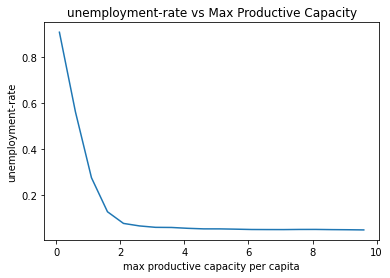

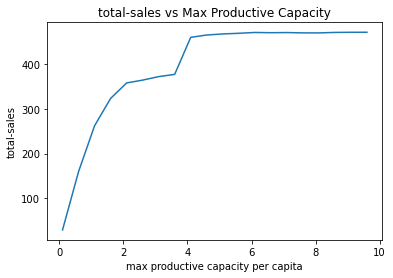

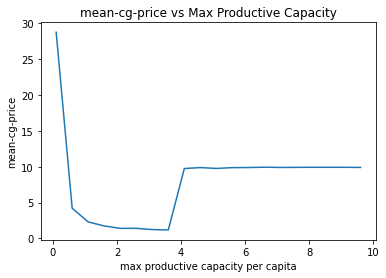

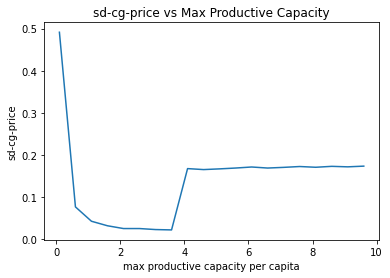

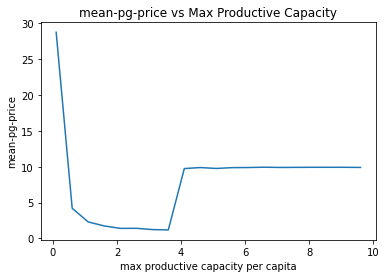

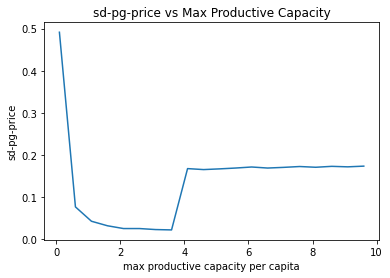

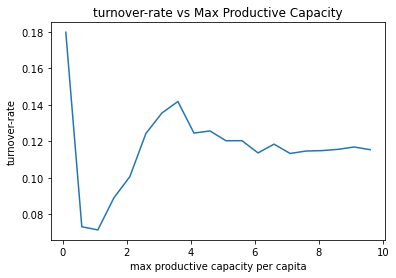

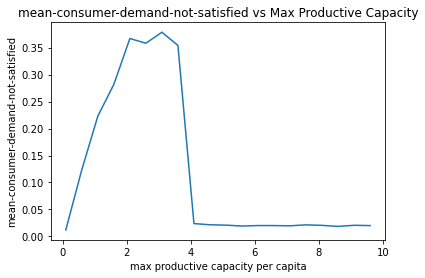

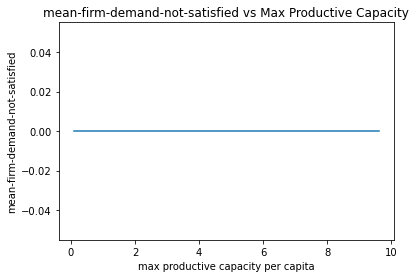

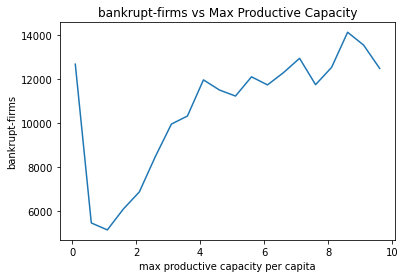

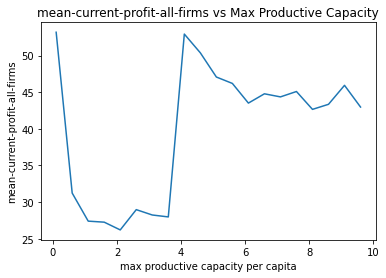

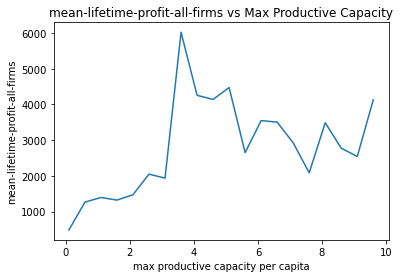

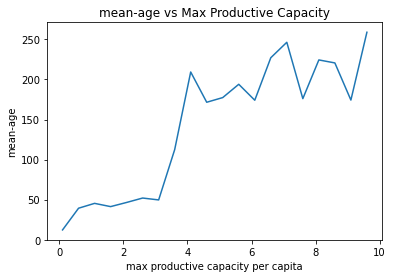

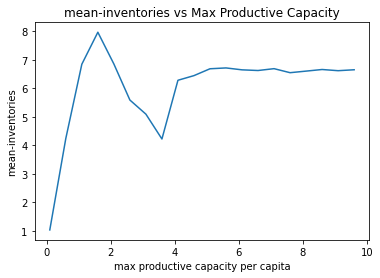

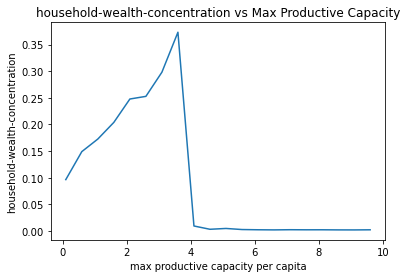

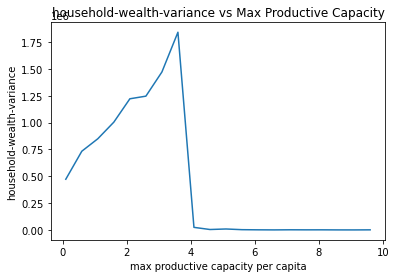

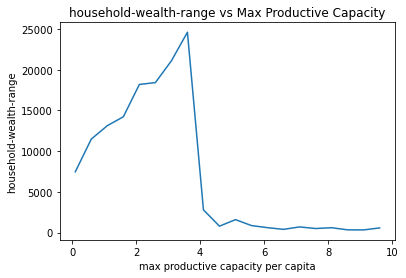

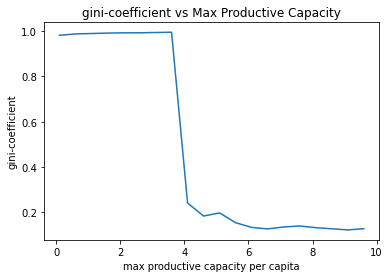

In [36]:
adf = df1[df1['[step]'] >= 2000].groupby('max-prod-capacity-per-capita').mean()
plot_vars_vs_prod_capacity(adf)

In [25]:
# adf2 = df.groupby('max-prod-capacity-per-capita').std()
# plot_vars_vs_prod_capacity(adf2)

### Plot individual trajectory

In [29]:
df1["max-prod-capacity-per-capita"].unique()

array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.6, 8.1, 9.1, 9.6])

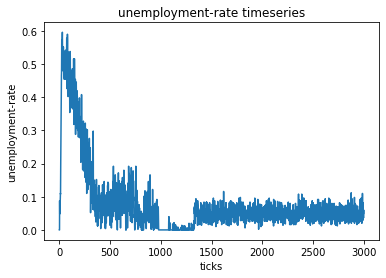

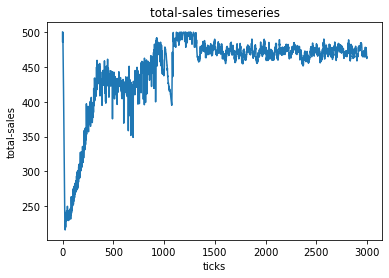

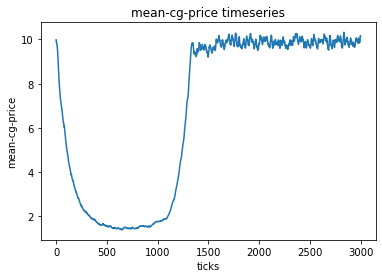

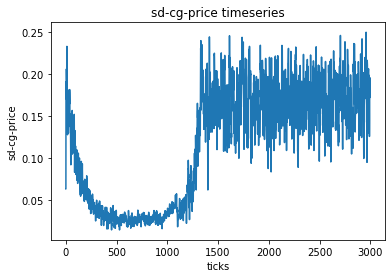

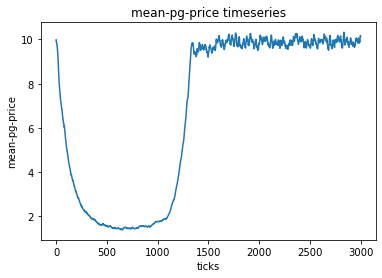

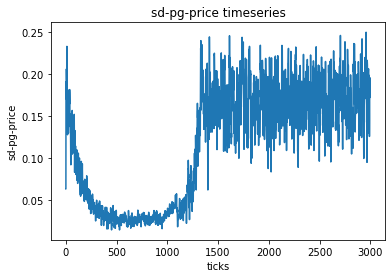

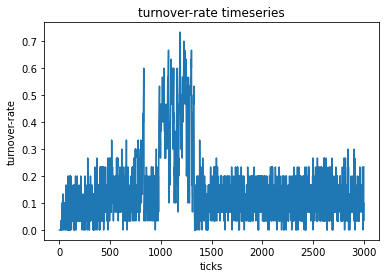

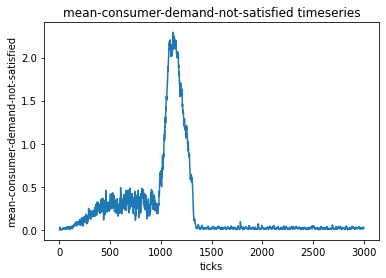

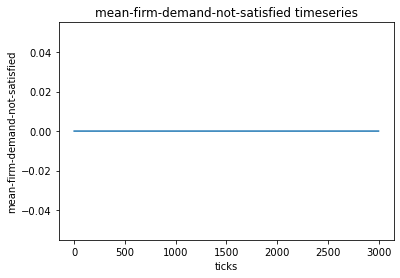

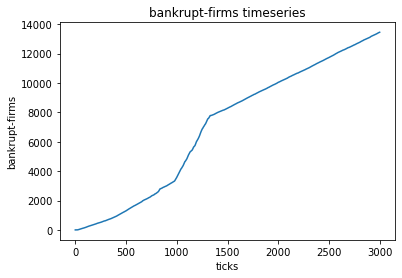

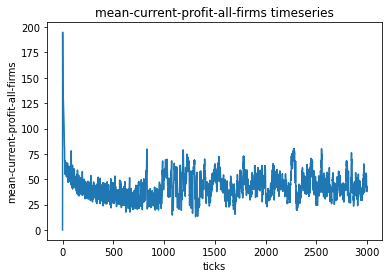

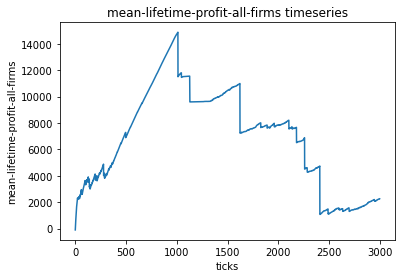

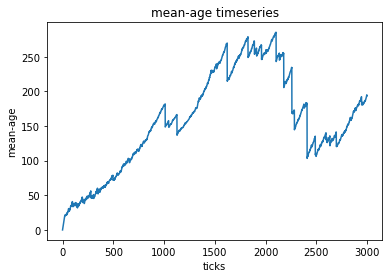

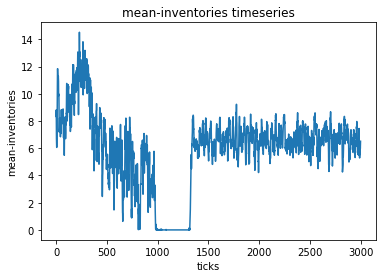

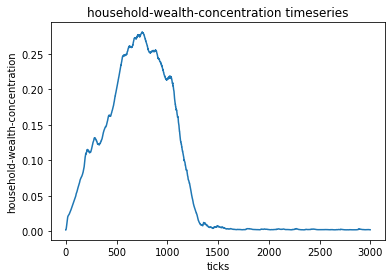

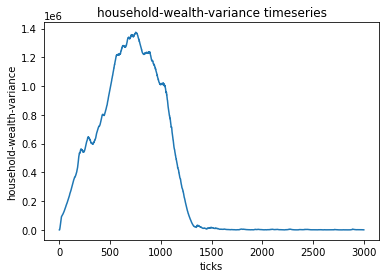

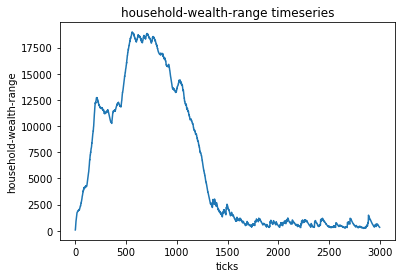

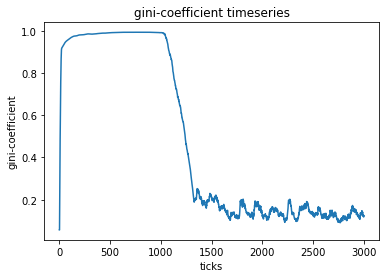

In [44]:
tdf = df1[df1["max-prod-capacity-per-capita"] == 6.1]
plot_var_timeseries(tdf)

## Two-layer PG -> CG

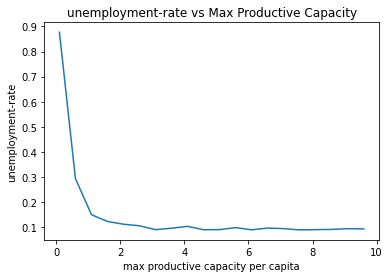

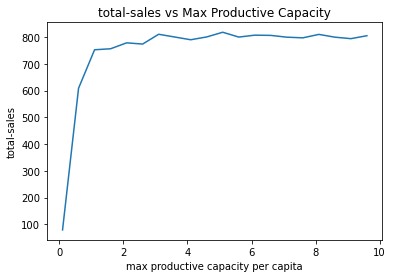

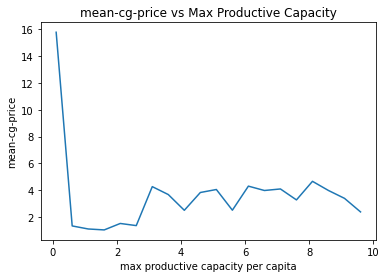

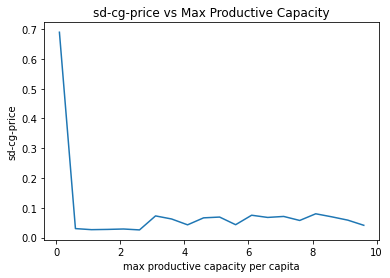

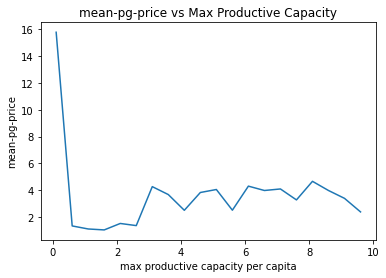

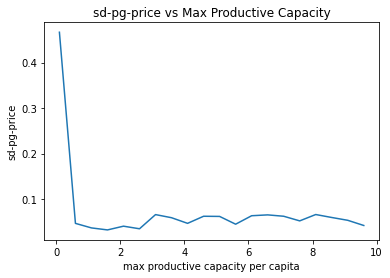

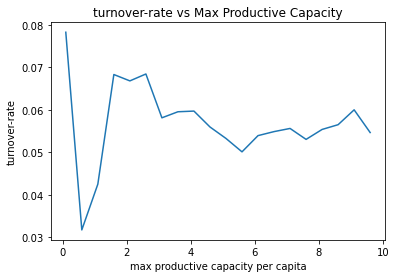

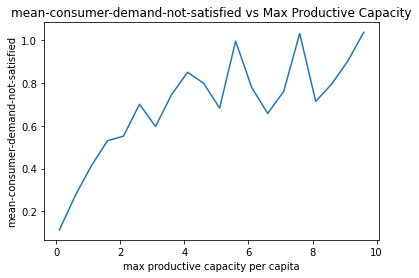

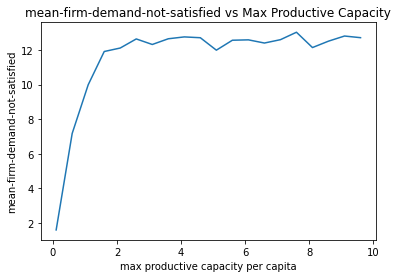

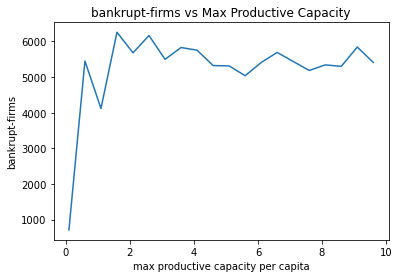

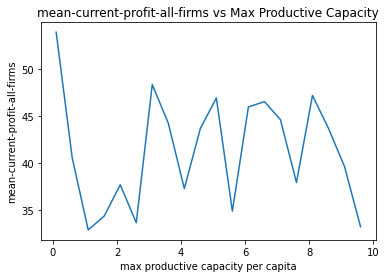

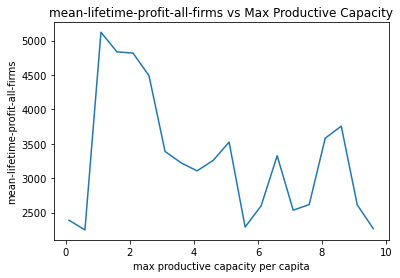

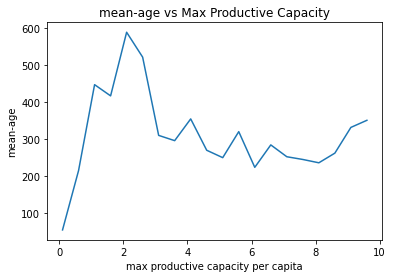

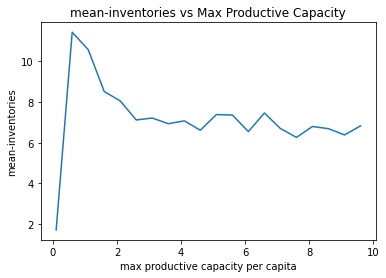

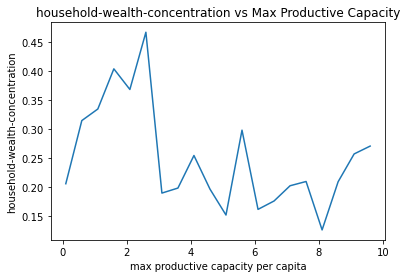

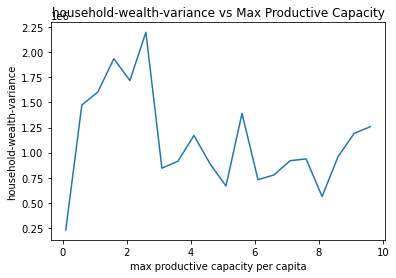

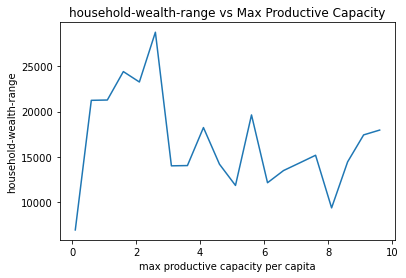

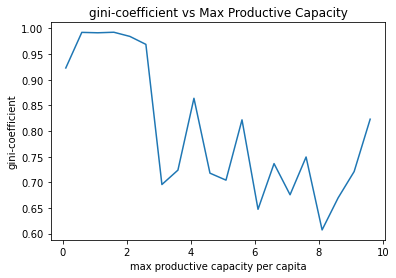

In [32]:
adf = df2.groupby('max-prod-capacity-per-capita').mean()
plot_vars_vs_prod_capacity(adf)

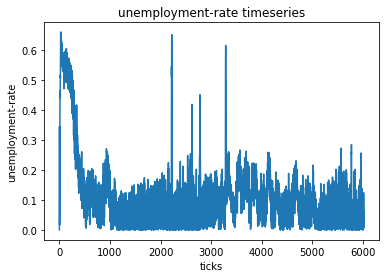

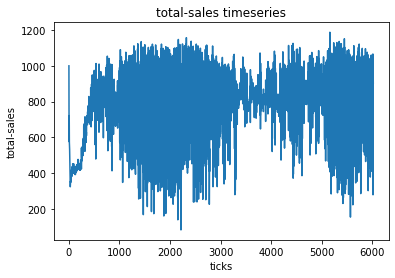

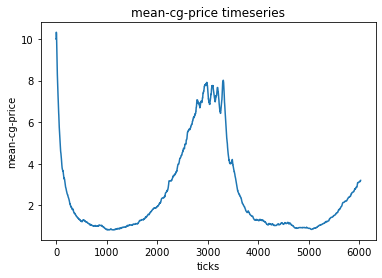

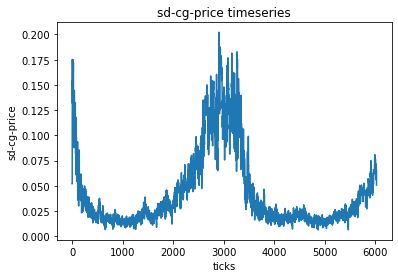

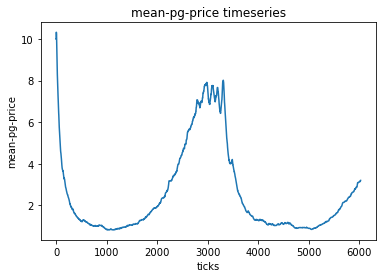

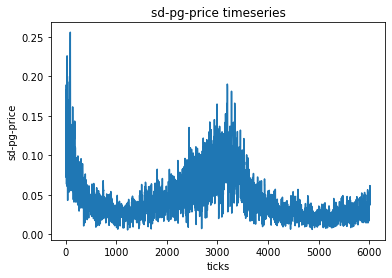

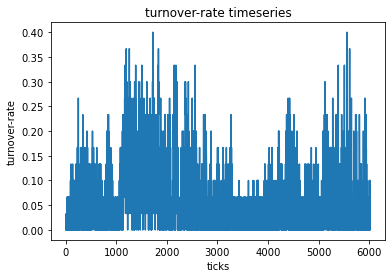

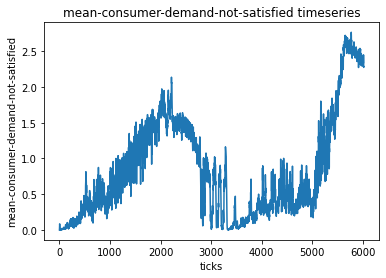

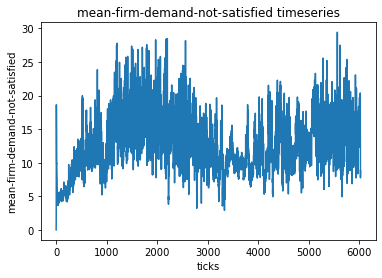

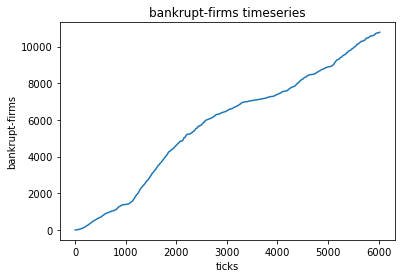

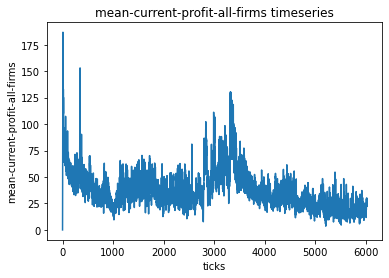

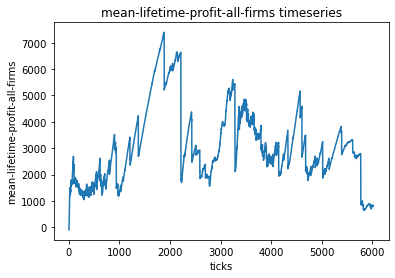

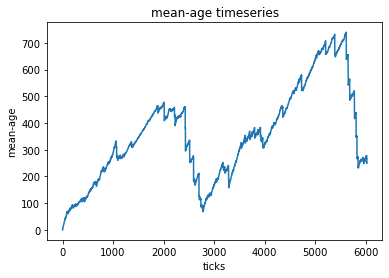

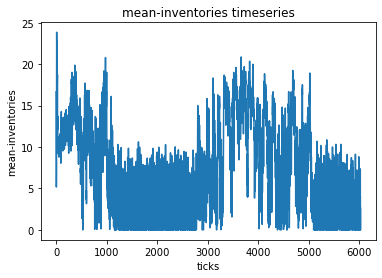

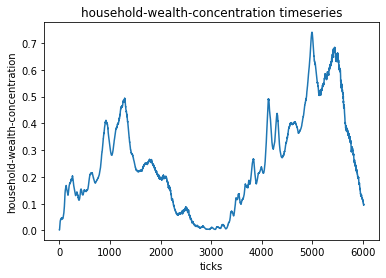

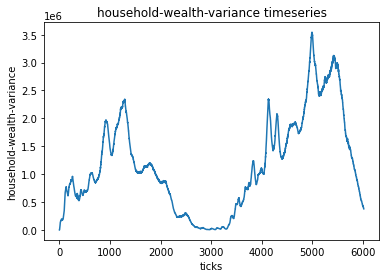

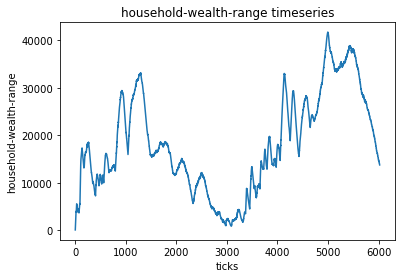

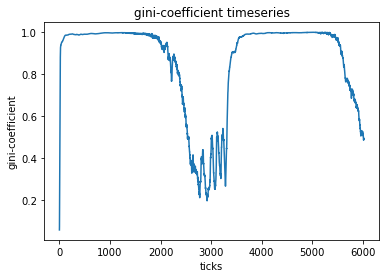

In [43]:
tdf = df2[df2["max-prod-capacity-per-capita"] == 4.1]
plot_var_timeseries(tdf)